# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy
import math
import random
import matplotlib
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dicenumbers = [1,2,3,4,5,6]
def dice(lst):
    return random.choices(lst, k=10)

ten_lst = dice(dicenumbers)
print(ten_lst)

[6, 6, 2, 4, 1, 3, 4, 1, 5, 5]


In [3]:
ten_df = pd.DataFrame(ten_lst, columns = ['dice value'])
print(type(ten_df))
ten_df

<class 'pandas.core.frame.DataFrame'>


,dice value
0,6
1,6
2,2
3,4
4,1
5,3
6,4
7,1
8,5
9,5


#### 2.- Plot the results sorted by value.

In [4]:
# your code here
ten_df.sort_values(by="dice value", inplace=True)
ten_df

,dice value
4,1
7,1
2,2
5,3
3,4
6,4
8,5
9,5
0,6
1,6


<AxesSubplot:>

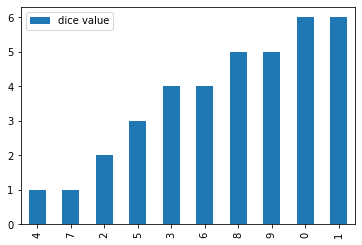

In [5]:
ten_df.plot(kind = 'bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<AxesSubplot:title={'center':'dice value'}>]], dtype=object)

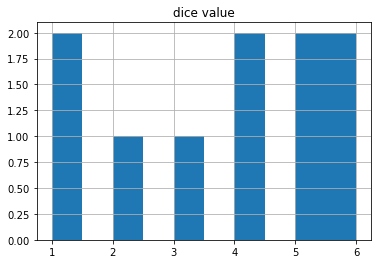

In [6]:
# your code here
ten_df.hist()

#### your comments here

Le second correspond au premier, transposé et avec les valeurs groupées par nombre d'occurrences.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, plus the median and the four quartiles. 

#### 1.- First, define a function that computes the mean. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def dicemean(df):
    return df['dice value'].sum()/df['dice value'].count()
print(dicemean(ten_df))

#check
ten_df.mean()

3.7


dice value    3.7
dtype: float64

In [8]:
# Alternatively:
def dicemean_(lst):
    return sum(lst)/len(lst)
print(dicemean_(ten_lst))

#check
ten_df.mean()

3.7


dice value    3.7
dtype: float64

#### 2.- Calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
def dicefreq(df):
    return df['dice value'].value_counts()
print(dicefreq(ten_df))

6    2
5    2
4    2
1    2
3    1
2    1
Name: dice value, dtype: int64


In [10]:
# your code here
def dicemean2(df):
    vlst = df['dice value'].value_counts().keys().tolist()
    print(vlst)
    flst = df['dice value'].value_counts().tolist()
    print(flst)
    return sum([v*f for v,f in zip(vlst,flst)])/sum(flst)
dicemean2(ten_df)

[6, 5, 4, 1, 3, 2]
[2, 2, 2, 2, 1, 1]


3.7

In [11]:
# Alternatively:
def dicefreq_(lst):
    return {i:lst.count(i) for i in set(dicenumbers)}
print(dicefreq_(ten_lst))

{1: 2, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2}


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here
def dicemedian(df):
    x = int(df['dice value'].count()/2)
    if df['dice value'].count() %2 ==0:
        med = (df.iloc[x-1,0] + df.iloc[x,0])/2
    else:
        med = df.iloc[x,0]
    return med
print(dicemedian(ten_df))

#check
print(ten_df.median())
print(ten_df.quantile())

4.0
dice value    4.0
dtype: float64
dice value    4.0
Name: 0.5, dtype: float64


In [13]:
# Alternatively:
def dicemedian_(lst):
    if len(sorted(lst))%2 ==0:
        x = int(len(sorted(lst))/2)
        y = (sorted(lst)[x-1] + sorted(lst)[x])/2
    else:
        x = math.floor(len(sorted(lst))/2)
        y = sorted(lst)[x]
    return y
dicemedian_(ten_lst)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [14]:
# your code here
def dicequartile(df):
    x = df['dice value'].count()
    print(x)
    if x%4 == 0:
        quart = (df.iloc[int(x/4)-1,0] + df.iloc[int(x/4),0])/2
    else:
        quart = df.iloc[int(x/4),0]
    quartilelist=[quart,quart*2,quart*3]
    return f'The 3 quartiles of our list are {quartilelist}.'

print(dicequartile(ten_df))

#check
ten_df.quantile(0.25)

10
The 3 quartiles of our list are [2, 4, 6].


dice value    2.25
Name: 0.25, dtype: float64

In [15]:
# Alternatively:
def dicequartile_(lst):
    if len(sorted(lst))%4 ==0:
        x = int(len(sorted(lst))/4)
        quart = (sorted(lst)[x-1] + sorted(lst)[x])/2
    else:
        x = math.floor(len(sorted(lst))/4)
        quart = sorted(lst)[x] 
    quartilelist=[quart, quart*2, quart*3]
    return f'The 3 quartiles of our list are {quartilelist}.'
dicequartile_(ten_lst)

'The 3 quartiles of our list are [2, 4, 6].'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [16]:
# your code here
hundred_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
hundred_df.columns = ["Unnamed", "roll", "dice value"]
hundred_df.sort_values(by=['dice value'], inplace = True)
hundred_df

,Unnamed,roll,dice value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


<AxesSubplot:>

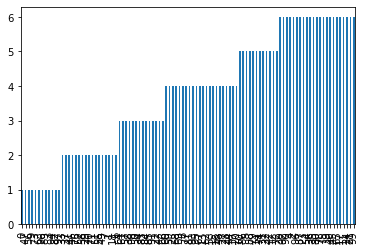

In [17]:
hundred_df['dice value'].plot(kind = 'bar')

In [18]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [19]:
# your code here
dicemean(hundred_df)

3.74

In [20]:
#check
hundred_df.mean()

Unnamed       49.50
roll          49.50
dice value     3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [21]:
# your code here
dicefreq(hundred_df)

6    23
4    22
2    17
3    14
5    12
1    12
Name: dice value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

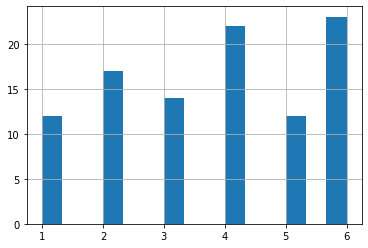

In [22]:
# your code here
hundred_df['dice value'].hist(bins=15)

In [23]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [24]:
# your code here
thousand_df = pd.read_csv('../data/roll_the_dice_thousand.csv')
thousand_df.shape
thousand_df.sample(2)

,Unnamed: 0,roll,value
306,306,306,5
314,314,314,5


<AxesSubplot:>

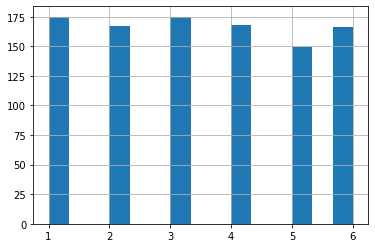

In [25]:
thousand_df['value'].hist(bins=15)

In [26]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(1000, 1)
observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
4.0             1
71.0            1
82.0            1
Length: 72, dtype: int64


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

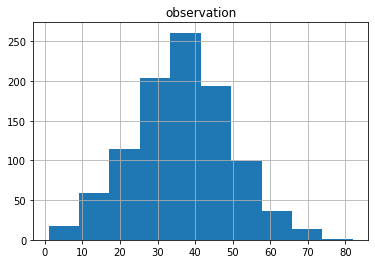

In [27]:
# your code here
age_df = pd.read_csv("../data/ages_population.csv")
print(age_df.shape)
print(age_df.value_counts())
age_df.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [28]:
# your code here
print(age_df.mean())
print(age_df.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [29]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(1000, 1)
observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
19.0             3
35.0             3
36.0             2
dtype: int64


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

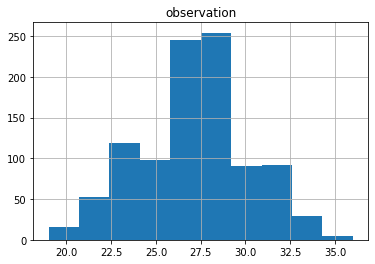

In [30]:
# your code here
age2_df = pd.read_csv("../data/ages_population2.csv")
print(age2_df.shape)
print(age2_df.value_counts())
age2_df.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [32]:
"""
Population beaucoup plus jeune avec une répartition plus étendue.
"""


'\nPopulation beaucoup plus jeune avec une répartition plus étendue.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [33]:
# your code here
print(age2_df.mean())
print(age2_df.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [34]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(1000, 1)
observation
32.0           37
35.0           31
37.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64


array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

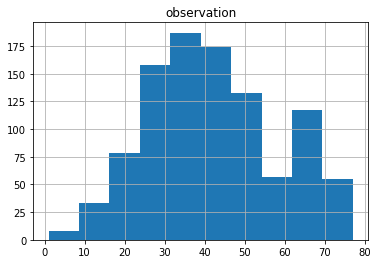

In [35]:
# your code here
age3_df = pd.read_csv("../data/ages_population3.csv")
print(age3_df.shape)
print(age3_df.value_counts())
age3_df.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [36]:
# your code here
print(age3_df.mean())
print(age3_df.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [37]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [40]:
# your code here
Q1 = age3_df.quantile(0.25)
print(Q1)
Q2 = age3_df.median()
print(Q2)
Q3 = age3_df.quantile(0.75)
print(Q3)

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
dtype: float64
observation    53.0
Name: 0.75, dtype: float64


##### Your comments below
"""
La moyenne est un peu au dessus de la médiane parce qu'il y a plus de gens très âgés
que de gens très jeunes, on le voit d'ailleurs dans la 2nde courbe en cloche.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [38]:
"""
Il y a 2 courbes en cloche, il serait intéressant de deviner 
quelle proportion fait partie de la seconde cloche.
"""

P = age3_df.quantile(0.82)
print(P)

observation    60.0
Name: 0.82, dtype: float64


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here


In [ ]:
"""
your comments here
"""